# Uber Rider Data Analysis Project

##  Project overview

The business is interested in predicting rider retention. To help explore this question, they have provided a sample dataset of a cohort of users who signed up for an account in January 2014. The data was pulled several months later. 

## Dataset description

- city: city this user signed up in
- phone: primary device for this user
- signup_date: date of account registration; in the form ‘YYYY­MM­DD’
- last_trip_date: the last time this user completed a trip; in the form ‘YYYY­MM­DD’ 
- avg_dist: the average distance *(in miles) per trip taken in the first 30 days after signup 
- avg_rating_by_driver: the rider’s average rating over all of their trips 
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips 
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips 
- trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
- luxury_car_user: True if the user took an luxury car in their first 30 days; False otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday

In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# This statement allow to display plot without asking to
%matplotlib inline

# Always make it pretty.
plt.style.use('ggplot')

## Load data and browse data

In [2]:
# Load data from file
#df = df.read_csv('data/uber_data.csv')
df = pd.read_csv('churn_data.csv')

In [3]:
# Inspect dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [4]:
# Browse dataset
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [5]:
# Show summary stats
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [6]:
# Count missing values by column
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
dtype: int64

## Explore data

### Numeric variables

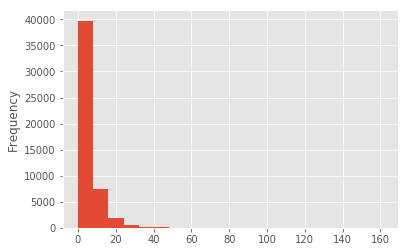

In [7]:
df['avg_dist'].plot.hist(bins=20)

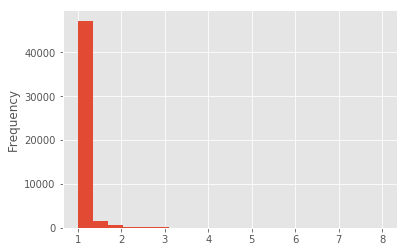

In [8]:
df['avg_surge'].plot.hist(bins=20)

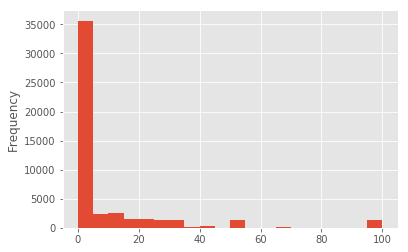

In [9]:
df['surge_pct'].plot.hist(bins=20)

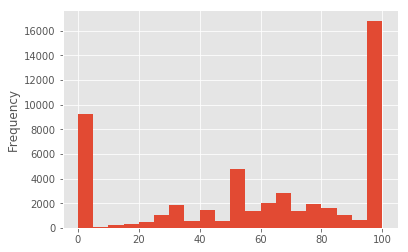

In [10]:
df['weekday_pct'].plot.hist(bins=20)

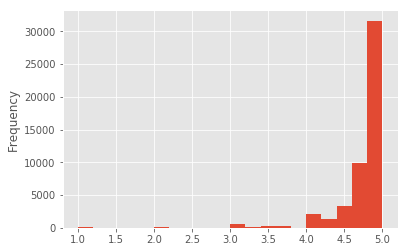

In [11]:
df['avg_rating_by_driver'].plot.hist(bins=20)

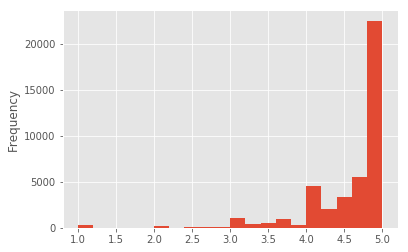

In [12]:
df['avg_rating_of_driver'].plot.hist(bins=20)

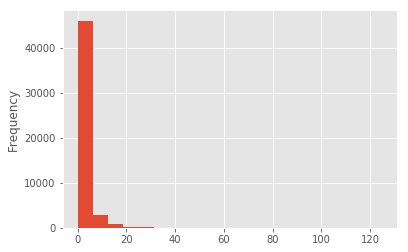

In [13]:
df['trips_in_first_30_days'].plot.hist(bins=20)

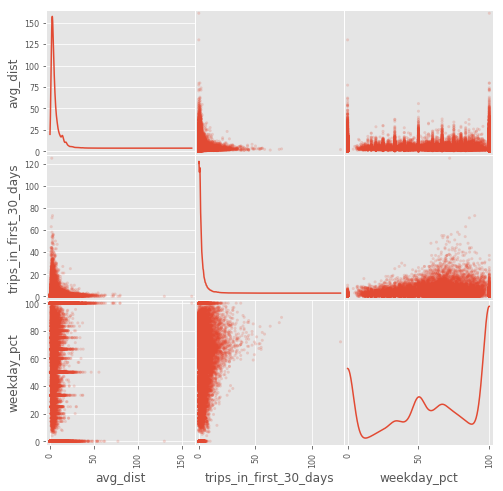

In [14]:
pd.plotting.scatter_matrix(df[['avg_dist', 'trips_in_first_30_days', 'weekday_pct']],
                          alpha=0.2, figsize=(8,8), diagonal='kde')
plt.show()

### Categorical data

In [15]:
df['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [16]:
df['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

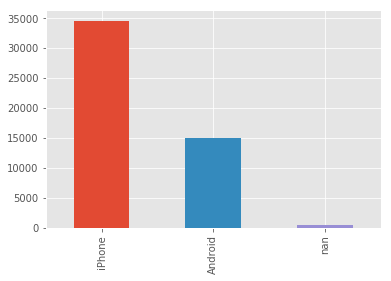

In [17]:
df['phone'].value_counts(dropna=False).plot.bar()

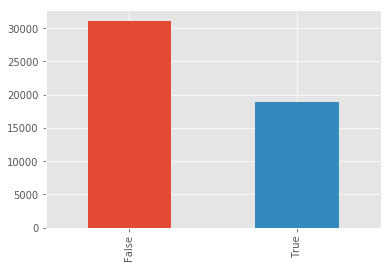

In [18]:
df['luxury_car_user'].value_counts().plot.bar()

## Clean data - dealing with missing values

In [19]:
# Count missing values by column
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
dtype: int64

In [20]:
# Fill missing value for phone
df['phone'] = df['phone'].fillna('no_phone')

In [21]:
# Fill missing value for raing with median
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].median())
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].median())

## Transform data

### Datetime variables

In [22]:
# Convert time-series information to datatime data type
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [23]:
# Construct new df to experiment time series
df_timestamp = df[['last_trip_date', 'signup_date']]

In [24]:
df_timestamp['count'] = 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


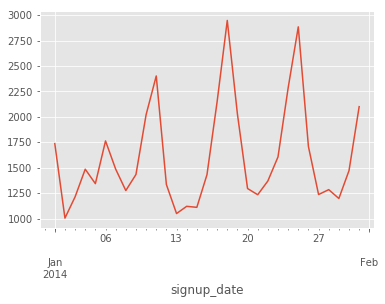

In [25]:
df_timestamp.set_index('signup_date', inplace=True)
df_timestamp['count'].resample('1D').sum().plot()

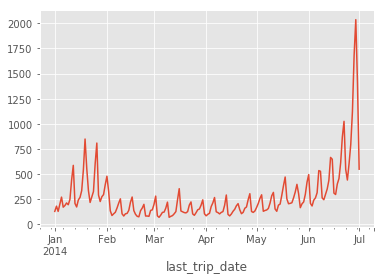

In [26]:
df_timestamp.set_index('last_trip_date', inplace=True)
df_timestamp['count'].resample('1D').sum().plot()

In [27]:
# check if day of week is useful
df['signup_dow'] = df['signup_date'].apply(lambda x: x.dayofweek)

In [28]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,signup_dow
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,5
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,4
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


### Concerting categorical variables

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
signup_dow                50000 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 4.6+ MB


In [30]:
# Convert bool to int
df['luxury_car_user'] = df['luxury_car_user'].astype(int)

In [31]:
col_category = ['city', 'phone', 'signup_dow']
df_dummies = pd.get_dummies(df[col_category], columns=col_category)

In [32]:
df_dummies.head()

,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_no_phone,signup_dow_0,signup_dow_1,signup_dow_2,signup_dow_3,signup_dow_4,signup_dow_5,signup_dow_6
0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,0,0,0,0
2,1,0,0,0,1,0,1,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,1,0,0
4,0,0,1,1,0,0,1,0,0,0,0,0,0


In [33]:
df = df.join(df_dummies)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,...,phone_Android,phone_iPhone,phone_no_phone,signup_dow_0,signup_dow_1,signup_dow_2,signup_dow_3,signup_dow_4,signup_dow_5,signup_dow_6
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,...,0,1,0,0,0,0,0,0,1,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,...,1,0,0,0,0,1,0,0,0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,...,0,1,0,1,0,0,0,0,0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,...,0,1,0,0,0,0,0,1,0,0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,...,1,0,0,1,0,0,0,0,0,0


In [34]:
df.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct',
       'signup_dow', 'city_Astapor', 'city_King's Landing', 'city_Winterfell',
       'phone_Android', 'phone_iPhone', 'phone_no_phone', 'signup_dow_0',
       'signup_dow_1', 'signup_dow_2', 'signup_dow_3', 'signup_dow_4',
       'signup_dow_5', 'signup_dow_6'],
      dtype='object')

## Define target label
Add churn indicator. Considered as churn if a user has not taken a trip in the last 30 days. 

In [35]:
# Define churn: users did not take a trip during last 30 days, i.e. last trip date is earlier than 2014-06-01
df['churn'] = (df.last_trip_date < pd.to_datetime('2014-06-01')) * 1
df['active'] = (df.last_trip_date >= pd.to_datetime('2014-06-01')) * 1

df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,...,phone_no_phone,signup_dow_0,signup_dow_1,signup_dow_2,signup_dow_3,signup_dow_4,signup_dow_5,signup_dow_6,churn,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,...,0,0,0,0,0,0,1,0,0,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,...,0,1,0,0,0,0,0,0,1,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,...,0,0,0,0,0,1,0,0,0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,...,0,1,0,0,0,0,0,0,1,0


In [36]:
df['churn'].mean()

0.62392

## EDA with label

In [37]:
colors = ['red' if x else 'blue' for x in df['active']]
colors[:5]

['red', 'blue', 'blue', 'red', 'blue']

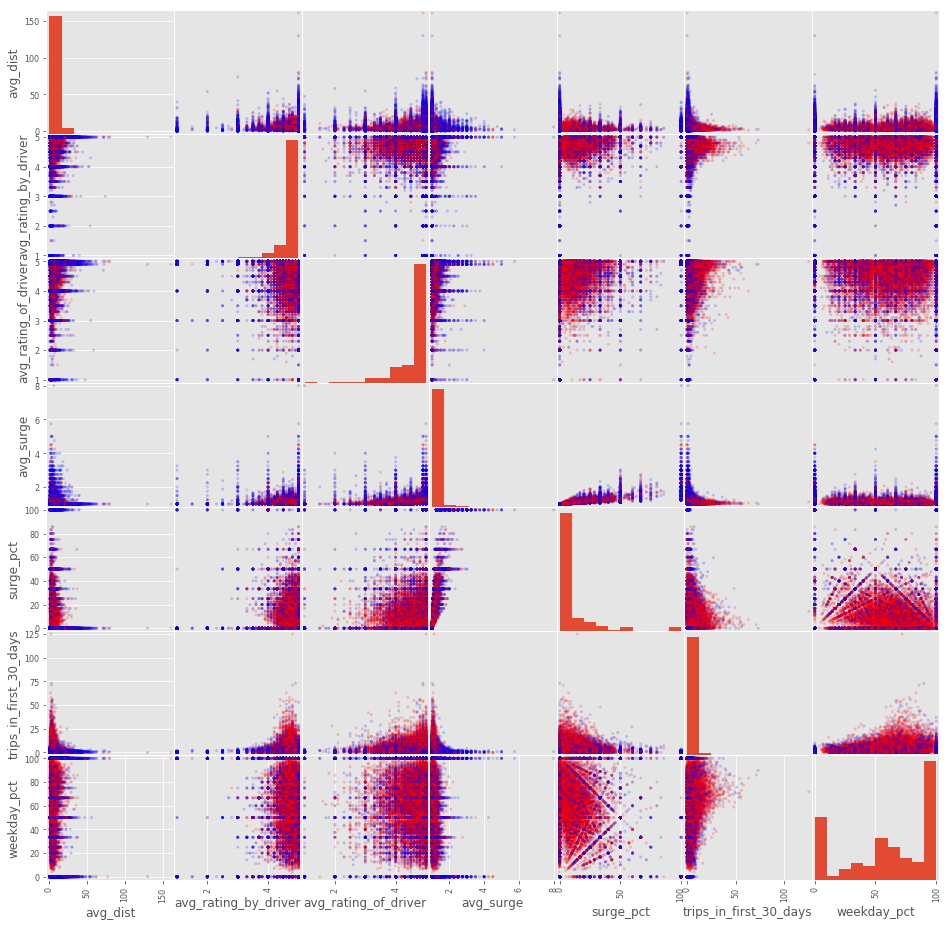

In [38]:
pd.plotting.scatter_matrix(df[['avg_dist','avg_rating_by_driver', 'avg_rating_of_driver', 
                               'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']],
              alpha=0.2,figsize=(16,16), diagonal='hist', c=colors)
plt.show()

In [39]:
### Explore churn rate split by featuers

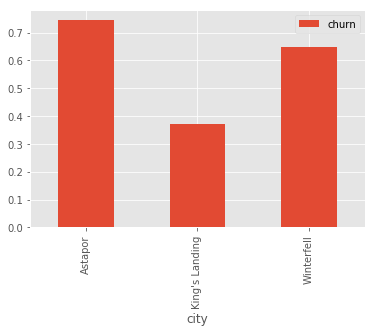

In [40]:
df[['city', 'churn']].groupby('city').mean().plot.bar()

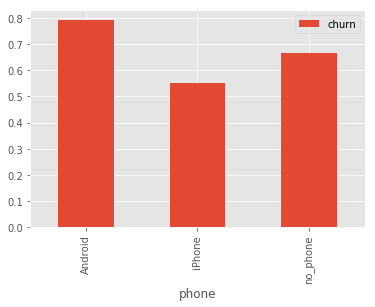

In [41]:
df[['phone', 'churn']].groupby('phone').mean().plot.bar()

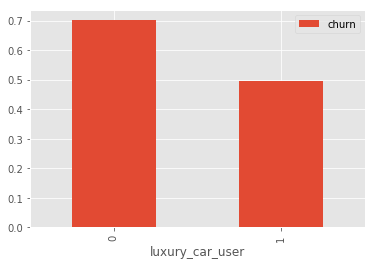

In [42]:
df[['luxury_car_user', 'churn']].groupby('luxury_car_user').mean().plot.bar()

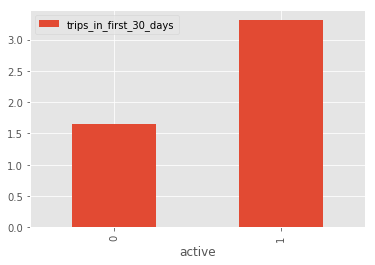

In [43]:
df[['trips_in_first_30_days', 'active']].groupby('active').mean().plot.bar()

In [44]:
is_active = df['active']==1

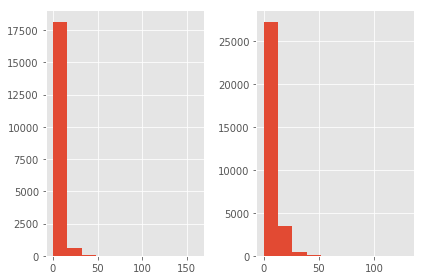

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].hist(df[is_active]['avg_dist'].values)
axes[1].hist(df[~is_active]['avg_dist'].values)
fig.tight_layout()
plt.show()

In [46]:
# plotting function
def hist_active_vs_churn(df, col_name):
    is_active = df['active']==1
    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].hist(df[is_active][col_name].values)
    axes[0].set_title('active users')
    axes[0].set_xlabel(col_name)
    axes[0].set_ylabel('counts')
    axes[1].hist(df[~is_active][col_name].values)
    axes[1].set_title('active users')
    axes[1].set_xlabel(col_name)
    axes[1].set_ylabel('counts')
    
    plt.tight_layout()
    plt.show()

In [47]:
cols = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge']

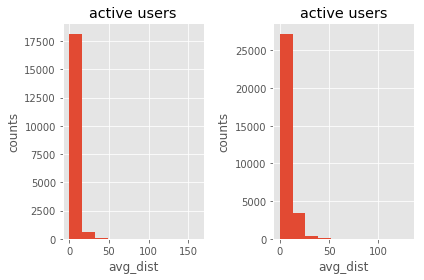

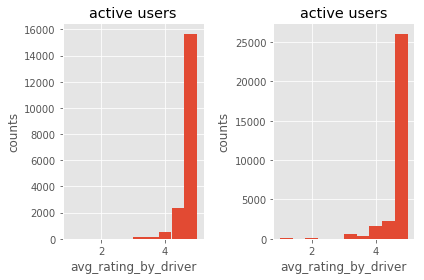

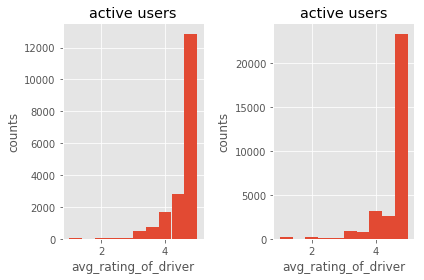

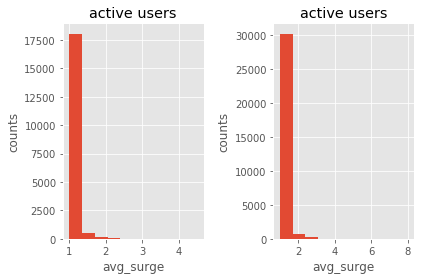

In [48]:
for col in cols:
    hist_active_vs_churn(df, col_name=col)

### Save cleaned data to csv

In [49]:
df.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct',
       'signup_dow', 'city_Astapor', 'city_King's Landing', 'city_Winterfell',
       'phone_Android', 'phone_iPhone', 'phone_no_phone', 'signup_dow_0',
       'signup_dow_1', 'signup_dow_2', 'signup_dow_3', 'signup_dow_4',
       'signup_dow_5', 'signup_dow_6', 'churn', 'active'],
      dtype='object')

In [50]:
selected_columns = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct',
       'city_Astapor', 'city_King\'s Landing', 'city_Winterfell',
       'phone_Android', 'phone_iPhone', 'phone_no_phone', 'signup_dow_0',
       'signup_dow_1', 'signup_dow_2', 'signup_dow_3', 'signup_dow_4',
       'signup_dow_5', 'signup_dow_6', 'churn']

In [51]:
cleaned_data_csv = 'cleaned_data.csv'
df[selected_columns].to_csv(cleaned_data_csv, index=False)

# Building Model

In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, make_scorer

In [53]:
selected_features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct',
       'city_Astapor', 'city_King\'s Landing', 'city_Winterfell',
       'phone_Android', 'phone_iPhone', 'phone_no_phone']
target = 'churn'

In [54]:
X = df[selected_features].values
y = df['churn'].values

In [55]:
print(X.shape)
print(y.shape)

(50000, 14)
(50000,)


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [57]:
## Logistic regression
clf = LogisticRegression(penalty='l2')
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
p_train_pred = clf.predict_proba(X_train)[:,1]

y_test_pred = clf.predict(X_test)
p_test_pred = clf.predict_proba(X_test)[:,1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [58]:
# train accuracy
accuracy_score(y_train, y_train_pred)

0.717475

In [59]:
# test accuracy
accuracy_score(y_test, y_test_pred)

0.7218

### Help function to calculate model score

In [60]:
def get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred, threshold=0.5):
    """create model performance measurement
        arguments: 
            y_train: train target label
            p_train_pred: train probability prediction
            y_test: test target label
            p_train_pred: test probability prediction
            threshold: probability threshold
        return: None. result is printed out
        """
    metric_names = ['AUC', 'Accuracy', 'Precision', 'Recall', 'f1-score']
    metric_values_train = [roc_auc_score(y_train, p_train_pred),
                          accuracy_score(y_train, p_train_pred>threshold),
                          precision_score(y_train, p_train_pred>threshold),
                          recall_score(y_train, p_train_pred>threshold),
                          f1_score(y_train, p_train_pred>threshold)]
    metric_values_test = [roc_auc_score(y_test, p_test_pred),
                          accuracy_score(y_test, p_test_pred>threshold),
                          precision_score(y_test, p_test_pred>threshold),
                          recall_score(y_test, p_test_pred>threshold),
                          f1_score(y_test, p_test_pred>threshold)]
    
    all_metrics = pd.DataFrame({'metrics': metric_names,
                               'train': metric_values_train,
                               'test': metric_values_test},
                              columns = ['metrics', 'train', 'test']).set_index('metrics')
    
    print(all_metrics)
    

In [61]:
def plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred):
    """plot logistic regression ROC curve
        arguments: 
            y_train: train target label
            p_train_pred: train probability prediction
            y_test: test target label
            p_train_pred: test probability prediction
            threshold: probability threshold
        return: None. 
        """
    roc_auc_train = roc_auc_score(y_train, p_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, p_train_pred)

    roc_auc_test = roc_auc_score(y_test, p_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, p_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = {:.4f})'.format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = {:.4f})'.format(roc_auc_test))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

              train      test
metrics                      
AUC        0.760681  0.764023
Accuracy   0.717475  0.721800
Precision  0.735859  0.739208
Recall     0.853237  0.857463
f1-score   0.790213  0.793956


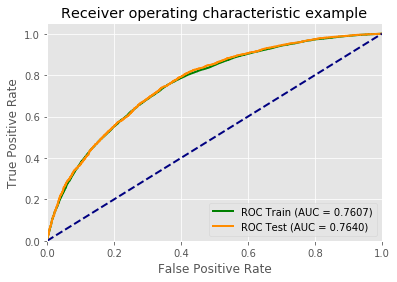

In [62]:
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

### Understanding the estimated Coefficients

In [63]:
df_coeffs = pd.DataFrame(list(zip(selected_features, clf.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
8,city_Astapor,0.659806
11,phone_Android,0.443715
3,avg_surge,0.198335
1,avg_rating_by_driver,0.145792
10,city_Winterfell,0.135279
2,avg_rating_of_driver,0.132317
0,avg_dist,0.035351
7,weekday_pct,0.000191
4,surge_pct,-0.004126
13,phone_no_phone,-0.049709


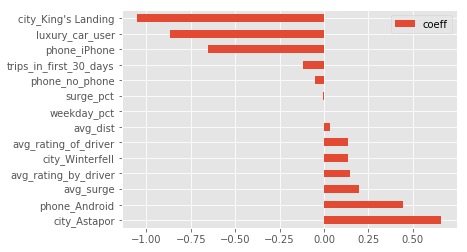

In [64]:
ax = df_coeffs.plot.barh()
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.show()

In [65]:
# define function to perform train, test, and get model performance
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

### Gradient Boosting Tree

              train      test
metrics                      
AUC        0.873381  0.861513
Accuracy   0.802925  0.792700
Precision  0.821706  0.811234
Recall     0.873522  0.871061
f1-score   0.846822  0.840083


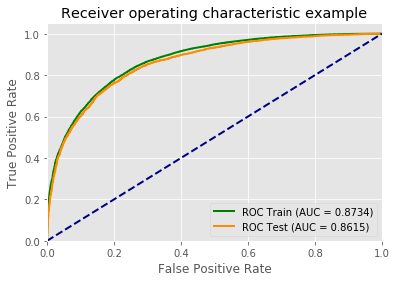

In [66]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier

# Choose some parameter combinations to try
parameters = {
    'n_estimators': 50,
    'max_depth': 5,
    'learning_rate': 0.2,
    'random_state': 42
}

# parameters = {
#     'n_estimators': 50,
#     'max_depth': 5,
#     'learning_rate': 0.2,
#     'subsample': 0.7,
#     'max_features':0.8,
#     'random_state': 42
# }

clf = GradientBoostingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### HyperParameter Tuning: Grid Search

In [67]:
# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
param_grid = {'n_estimators': [100,200], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [15,20,25], 
              'min_samples_split': [2],
              'min_samples_leaf': [2,10,20],
              'n_jobs':[-1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              train      test
metrics                      
AUC        0.894957  0.857238
Accuracy   0.816075  0.788100
Precision  0.825631  0.802312
Recall     0.893846  0.877140
f1-score   0.858386  0.838059


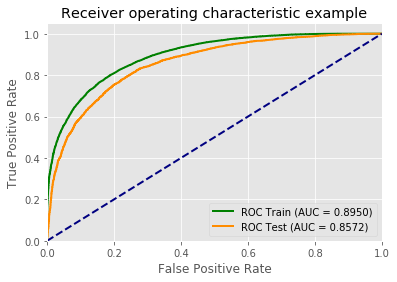

In [68]:
# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)